# Project Holly
Survey analysis. 

Many thanks to [Praveen Kumar Anwla](https://github.com/Praveen76/ANOVA-Test-COVID-19/blob/master/One%20Way%20ANOVA%20Test.ipynb) ([code](https://github.com/Praveen76/ANOVA-Test-COVID-19/blob/master/One%20Way%20ANOVA%20Test.ipynb)) for the ANOVA sample code and article.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.multicomp

%matplotlib inline

In [2]:
image_directory="images/"
image_extension="png"

def save_figure(fig, filename):
    filepath = image_directory + filename + "." + image_extension
    fig.savefig(filepath)
    
def increase_axes(chart):
    chart.set_xlabel(
        chart.get_xlabel(), 
        fontsize='large'
    )
    chart.set_ylabel(
        chart.get_ylabel(), 
        fontsize='large'
    )

def rotate_xlabels(chart):
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right',
        fontweight='light'
    )
    
def create_countplot(data, x, save, order=None, ax=None, save_filename=None, hue=None, show_labels=False):
    if not ax:
        fig, ax = plt.subplots();
    
    if not save_filename:
        save_filename=x;
        
    chart = sns.countplot(ax=ax, data=data, x=x, order=order, hue=hue);
        
    rotate_xlabels(chart);
    increase_axes(chart);
    
    if show_labels:
        for p in ax.patches: 
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
    if save:
        save_figure(chart.get_figure(), save_filename);
        plt.show()
    return chart;
    
def create_histogram(data, name, save, ax=None, save_filename=None, hue=None):
    if not ax:
        fig, ax = plt.subplots();
    if not save_filename:
        save_filename=x;


    chart = sns.histplot(ax=ax, data=data, hue=hue)
    increase_axes(chart);
    if save:
        save_figure(chart.get_figure(), save_filename)
        plt.show()
    return chart;

In [3]:
def anova_analysis(data, columns, variable, value):    
    data_combined = pd.melt(data[columns], var_name=variable, value_name=value)
    ols_string = value + ' ~ C(' + variable + ')';
    model = ols(ols_string, data_combined).fit()
    model.summary()

    # Seeing if the overall model is significant
    print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

    # Creates the ANOVA table
    display(sm.stats.anova_lm(model, typ= 2))

    #Post hoc test
    mc = statsmodels.stats.multicomp.MultiComparison(data_combined[value],data_combined[variable])
    mc_results = mc.tukeyhsd();
    print(mc_results);
    

In [4]:
sns.set(font_scale=1.1)
NO_YES = ["No", "Yes"]

# Data Preparation

In [5]:
survey_data = pd.read_csv("clean_survey_data.csv");
[n_rows, n_cols] = survey_data.shape # rows & columns
display(n_rows, n_cols)

122

45

In [6]:
display(survey_data.isnull().sum()) # display null values

Progress                                   0
Duration (in seconds)                      0
Finished                                   0
Age_Range                                  0
Gender                                     0
Degree                                     0
Income                                     0
Employment                                 0
Job_Type                                   0
Industry_Manufacturing                     0
Industry_Automobile                        0
Industry_Construction                      0
Technology_VR                              0
Technology_AR                              0
Technology_MR                              0
Used                                      21
Use_Cases                                 54
Use_Cases_Other                          122
Effective_Channel_LinkedIn                 0
Effective_Channel_FB_IG                    0
Effective_Channel_Google                   0
Effective_Channel_YouTube                  0
Effective_

In [7]:
# replace nulls with 0 in numeric fields
#replace_nulls_cols = ['Spend_Insurance', 'Spend_Food', 'Spend_Boarding', 'Spend_Grooming']
#survey_data[replace_nulls_cols] = survey_data[replace_nulls_cols].fillna(0)

# display(survey_data.isnull().sum()) # display missing values

# Visualize the Data

## Demographics
What is your age range? <br>
What is your gender? <br>
What is the highest degree you have completed? <br>
What is your household income? <br>
What is your employment status? <br>
What would you consider yourself? 

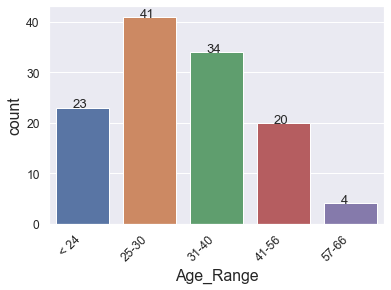

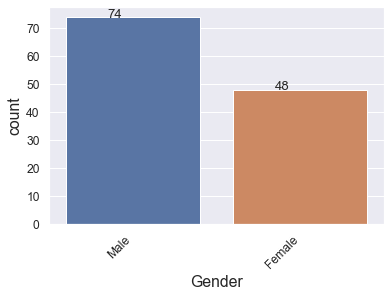

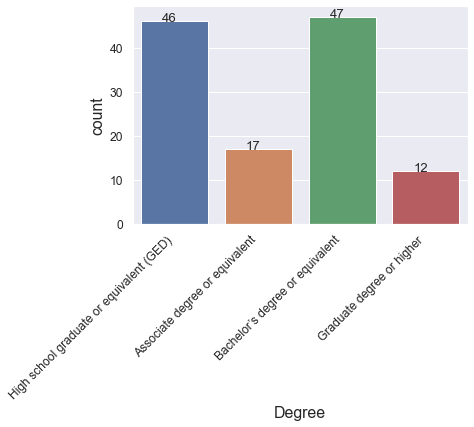

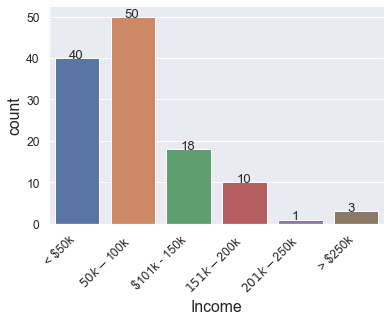

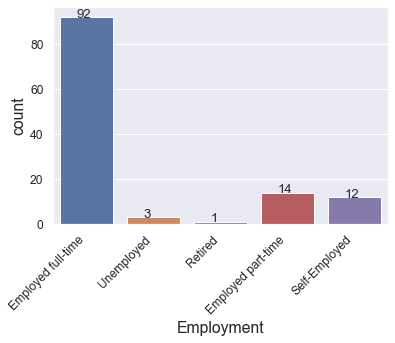

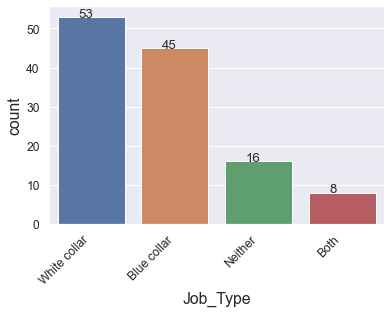

In [8]:
# Age_Range                                  0
# Gender                                     0
# Degree                                     0
# Income                                     0
# Employment                                 0
# Job_Type                                   0
order_age = ["< 24", "25-30", "31-40", "41-56", "57-66"]
create_countplot(survey_data, "Age_Range", True, order_age, show_labels=True);
create_countplot(survey_data, "Gender", True, show_labels=True);

order_degree = [
    'High school graduate or equivalent (GED)',
    'Associate degree or equivalent',
    'Bachelor’s degree or equivalent',
    'Graduate degree or higher'
        ]
create_countplot(survey_data, "Degree", True, order_degree, show_labels=True);

order_income = [
    '< $50k', 
    '$50k - $100k', 
    '$101k - 150k',   
    '$151k - $200k', 
    '$201k - $250k',
    '> $250k'
]
create_countplot(survey_data, "Income", True, order_income, show_labels=True);
create_countplot(survey_data, "Employment", True, show_labels=True);
create_countplot(survey_data, "Job_Type", True, show_labels=True);

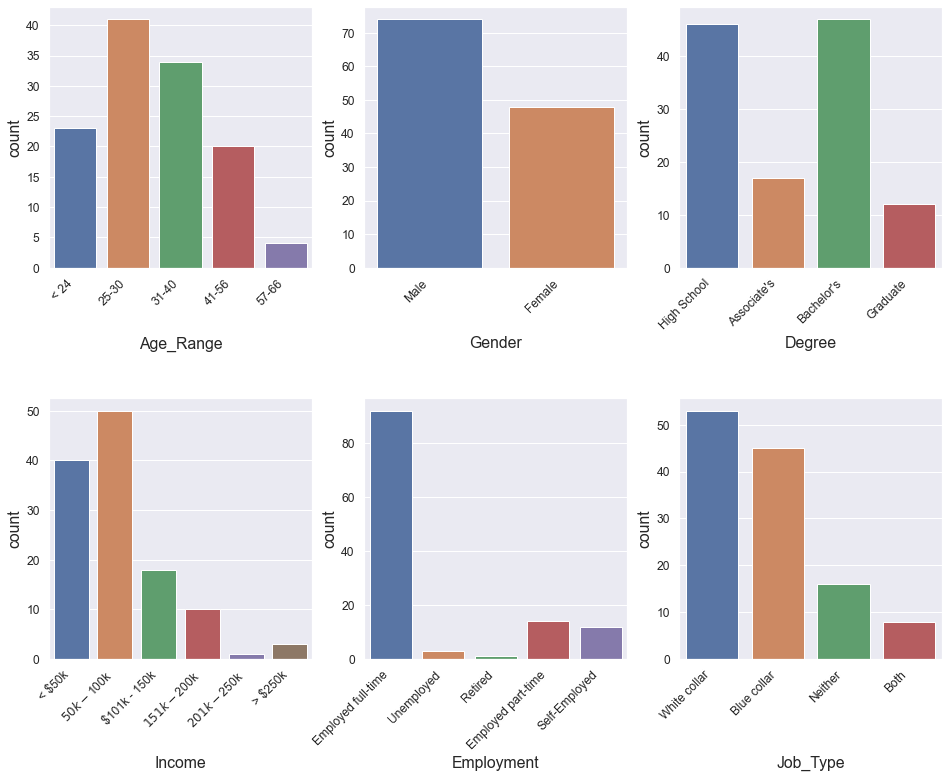

In [9]:
fig, axes = plt.subplots(2,3, figsize=(16,12));
create_countplot(survey_data, "Age_Range", False, order_age, ax=axes[0][0]);
create_countplot(survey_data, "Gender", False, ax=axes[0][1]);
chart = create_countplot(survey_data, "Degree", False, order_degree, ax=axes[0][2]);
axes[0][2].set_xticklabels(["High School", "Associate's", "Bachelor's", "Graduate"], rotation=45)
create_countplot(survey_data, "Income", False, order_income, ax=axes[1][0]);
create_countplot(survey_data, "Employment", False, ax=axes[1][1]);
create_countplot(survey_data, "Job_Type", False, ax=axes[1][2]);
fig.align_xlabels(axes)
fig.subplots_adjust(hspace=0.5)
save_figure(fig, 'Demographics');

## Participant Industries
Are you in the manufacturing industry? <br>
Are you in the automobile industry? <br>
Are you in the construction industry?

[44, 5, 31, 42]


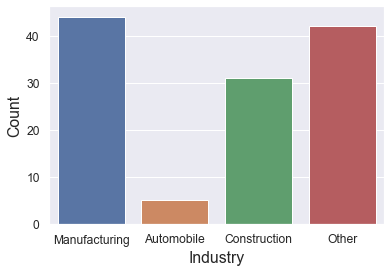

In [10]:
# Industry_Manufacturing                     0
# Industry_Automobile                        0
# Industry_Construction                      0
n_manufacturing = (survey_data["Industry_Manufacturing"]=="Yes").sum()
n_automotive = (survey_data["Industry_Automobile"]=="Yes").sum()
n_construction = (survey_data["Industry_Construction"]=="Yes").sum()
n_other = n_rows - n_manufacturing - n_automotive - n_construction

x = ["Manufacturing", "Automobile", "Construction", "Other"]
y = [n_manufacturing, n_automotive, n_construction, n_other]
print(y)

chart = sns.barplot(x=x, y=y)
chart.set_xlabel("Industry");
chart.set_ylabel("Count");
increase_axes(chart)
save_figure(chart.get_figure(), "Industry")

In [11]:
# create a column for hue
survey_data.loc[survey_data['Industry_Manufacturing'] == "Yes", 'Industry'] = 'Manufacturing'
survey_data.loc[survey_data['Industry_Automobile'] == "Yes", 'Industry'] = 'Automotive'
survey_data.loc[survey_data['Industry_Construction'] == "Yes", 'Industry'] = 'Construction'
survey_data['Industry'] = survey_data['Industry'].fillna('Other')

# an even simpler column
survey_data.loc[survey_data['Industry_Manufacturing'] == "Yes", 'Industry_Simple'] = 'MAC'
survey_data.loc[survey_data['Industry_Automobile'] == "Yes", 'Industry_Simple'] = 'MAC'
survey_data.loc[survey_data['Industry_Construction'] == "Yes", 'Industry_Simple'] = 'MAC'
survey_data['Industry_Simple'] = survey_data['Industry_Simple'].fillna('Other')

In [12]:
# delete the survey_data that is Other
survey_data = survey_data[survey_data['Industry'] == 'Other']

## Technologies Used
Rate how familiar you are with the following technology?

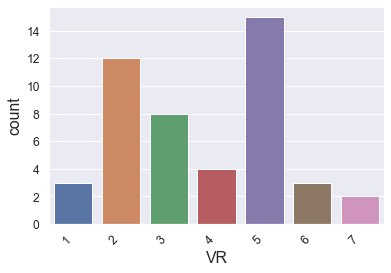

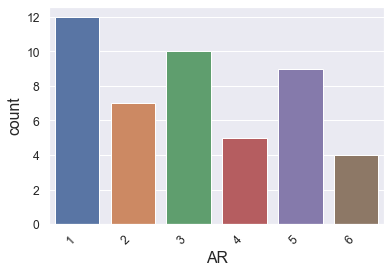

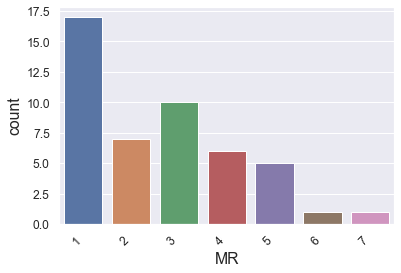

In [13]:
# Technology_VR                              0
# Technology_AR                              0
# Technology_MR                              0
technology = pd.DataFrame(columns=["VR", "AR", "MR"])
technology["VR"] = survey_data["Technology_VR"].replace(to_replace={
    '^1.*$': 1,
    '^2.*$': 2,
    '^3.*$': 3,
    '^4.*$': 4,
    '^5.*$': 5,
    '^6.*$': 6,
    '^7.*$': 7
}, regex=True)
create_countplot(technology, "VR", True);

technology["AR"] = survey_data["Technology_AR"].replace(to_replace={
    '^1.*$': 1,
    '^2.*$': 2,
    '^3.*$': 3,
    '^4.*$': 4,
    '^5.*$': 5,
    '^6.*$': 6,
    '^7.*$': 7
}, regex=True)
create_countplot(technology, "AR", True);

technology["MR"] = survey_data["Technology_MR"].replace(to_replace={
    '^1.*$': 1,
    '^2.*$': 2,
    '^3.*$': 3,
    '^4.*$': 4,
    '^5.*$': 5,
    '^6.*$': 6,
    '^7.*$': 7
}, regex=True)
create_countplot(technology, "MR", True);

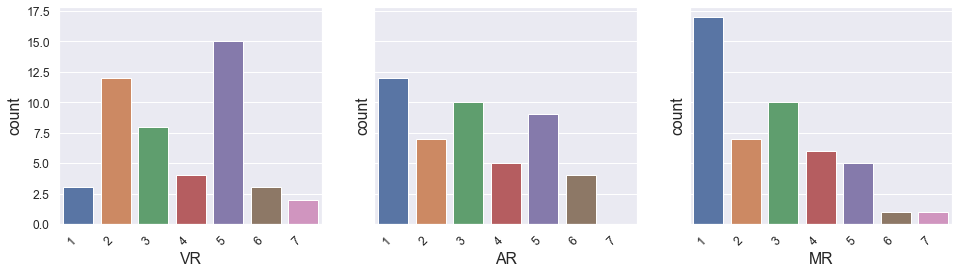

In [14]:
fig, axes = plt.subplots(1,3, figsize=(16,4), sharey=True);
order = list(range(1,8));
create_countplot(technology, "VR", False, ax=axes[0], order=order);
create_countplot(technology, "AR", False, ax=axes[1], order=order);
create_countplot(technology, "MR", False, ax=axes[2], order=order);
fig.align_xlabels(axes)
save_figure(chart.get_figure(), "Technologies")

,VR,AR,MR
count,47.000000,47.000000,47.000000
mean,3.702128,3.085106,2.617021
std,1.640717,1.691793,1.609121
min,1.000000,1.000000,1.000000
25%,2.000000,1.500000,1.000000
50%,4.000000,3.000000,2.000000
75%,5.000000,5.000000,4.000000
max,7.000000,6.000000,7.000000


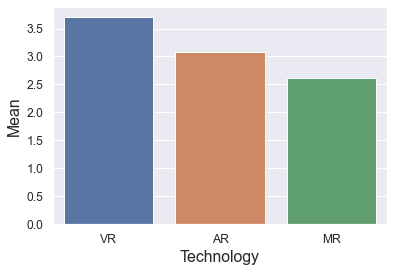

In [15]:
display(technology.describe());
means = technology.mean();

chart = sns.barplot(x=means.index, y=means);
chart.set_xlabel("Technology");
chart.set_ylabel("Mean");
increase_axes(chart)
save_figure(chart.get_figure(), "Technology_Means")

In [33]:
# one-sided p-test to see if users are moderately familiar
statistic, pvalue = stats.ttest_1samp(technology["VR"], 5.0, alternative='less')
print(f"statistic = {statistic}, pvalue = {pvalue}")

statistic, pvalue = stats.ttest_1samp(technology["AR"], 5.0, alternative='less')
print(f"statistic = {statistic}, pvalue = {pvalue}")

statistic, pvalue = stats.ttest_1samp(technology["MR"], 5.0, alternative='less')
print(f"statistic = {statistic}, pvalue = {pvalue}")

statistic = -5.423095576858187, pvalue = 1.0495865071202066e-06
statistic = -7.759723970327103, pvalue = 3.350122839042208e-10
statistic = -10.152675171970818, pvalue = 1.2541268594326093e-13


In [17]:
variable = "Technology";
value = "Score"
columns = ["VR", "MR", "AR"]
anova_analysis(technology, columns, variable, value);

Overall model F( 2, 138) =  5.129, p =  0.0071


,sum_sq,df,F,PR(>F)
C(Technology),27.843972,2.0,5.12882,0.007104
Residual,374.595745,138.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AR     MR  -0.4681 0.3565 -1.2734 0.3372  False
    AR     VR    0.617 0.1685 -0.1883 1.4223  False
    MR     VR   1.0851 0.0049  0.2798 1.8904   True
---------------------------------------------------


## Used Channels
Have you used any of the following (Check all that applies):

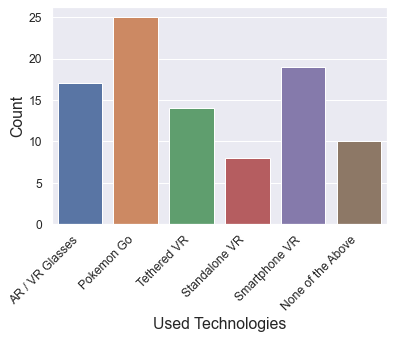

In [18]:
# Used                                      21
USED_GLASSES = "AR / VR Glasses"
USED_POKEMON = "Pokemon Go"
USED_TETHERED = "Tethered VR"
USED_STANDALONE = "Standalone VR"
USED_SMARTPHONE = "Smartphone VR"
USED_NONE = "None of the Above"

columns = [USED_GLASSES, USED_POKEMON, USED_TETHERED, 
          USED_STANDALONE, USED_SMARTPHONE, USED_NONE]
used_data = pd.DataFrame(columns=columns)
used_data[USED_GLASSES] = survey_data["Used"].str.contains(USED_GLASSES)
used_data[USED_POKEMON] = survey_data["Used"].str.contains(USED_POKEMON)
used_data[USED_TETHERED] = survey_data["Used"].str.contains(USED_TETHERED)
used_data[USED_STANDALONE] = survey_data["Used"].str.contains(USED_STANDALONE)
used_data[USED_SMARTPHONE] = survey_data["Used"].str.contains(USED_SMARTPHONE)
used_data[USED_NONE] = survey_data["Used"].str.contains("Not Applicable")
used_data[USED_NONE] = survey_data["Used"].fillna(True)

Used = used_data[used_data==True][columns].count();
chart = sns.barplot(y=Used.values, x=Used.index);
rotate_xlabels(chart)
chart.set_xlabel("Used Technologies");
chart.set_ylabel("Count");
increase_axes(chart)
save_figure(chart.get_figure(), 'Used');

## Use Cases
Thinking about your workplace, can you see any of the following technologies having potential use cases? (Check all the applies)

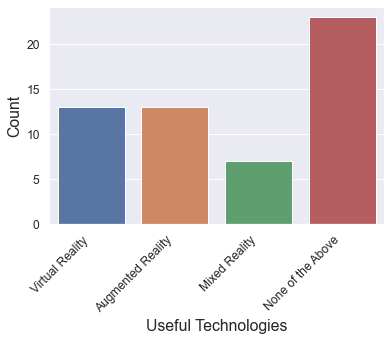

In [19]:
# Use_Cases                                 54
# Use_Cases_Other                          122
# There are no Use_Cases_Other
#display(survey_data["Use_Cases_Other"].unique())

USEFUL_VIRTUAL = "Virtual Reality"
USEFUL_AUGMENTED = "Augmented Reality"
USEFUL_MIXED = "Mixed Reality"
USEFUL_NONE = "None of the Above"

columns = [USEFUL_VIRTUAL, USEFUL_AUGMENTED, USEFUL_MIXED, USEFUL_NONE]
used_data = pd.DataFrame(columns=columns)
used_data[USEFUL_VIRTUAL] = survey_data["Use_Cases"].str.contains(USEFUL_VIRTUAL)
used_data[USEFUL_AUGMENTED] = survey_data["Use_Cases"].str.contains(USEFUL_AUGMENTED)
used_data[USEFUL_MIXED] = survey_data["Use_Cases"].str.contains(USEFUL_MIXED)
used_data[USEFUL_NONE] = survey_data["Use_Cases"].str.contains("Not Applicable")
used_data[USEFUL_NONE] = survey_data["Use_Cases"].fillna(True)

Used = used_data[used_data==True][columns].count();
chart = sns.barplot(y=Used.values, x=Used.index);
rotate_xlabels(chart);
chart.set_xlabel("Useful Technologies");
chart.set_ylabel("Count");
increase_axes(chart);
save_figure(chart.get_figure(), 'Useful');

## Effective Channels
If you are looking for certain products that could assist you in projects for your business/workplace, which of the following channels do you think would be most effective in finding you what you want: 

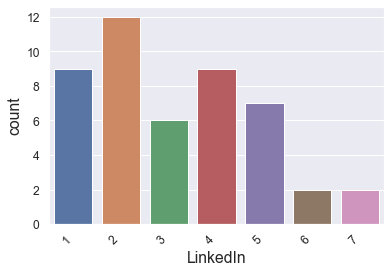

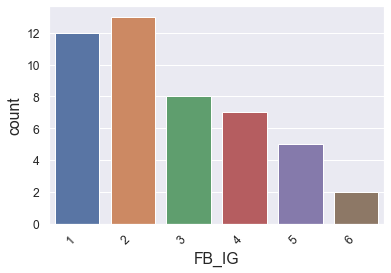

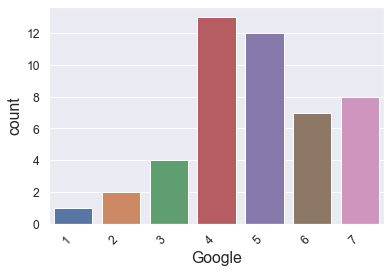

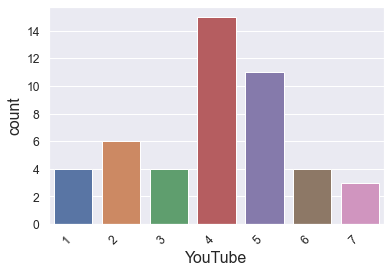

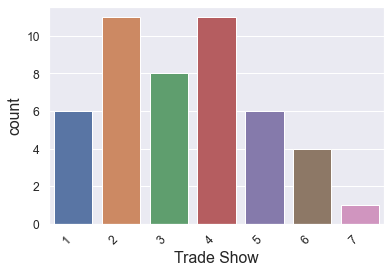

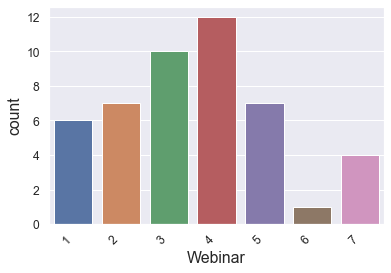

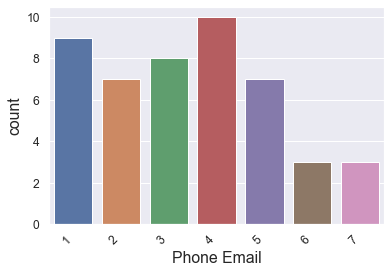

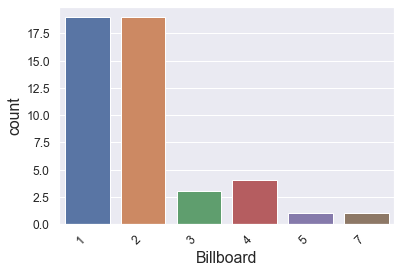

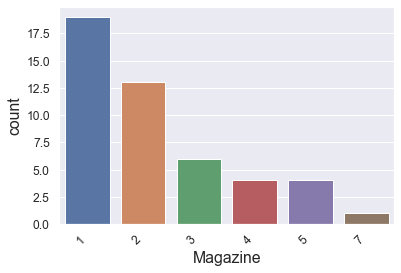

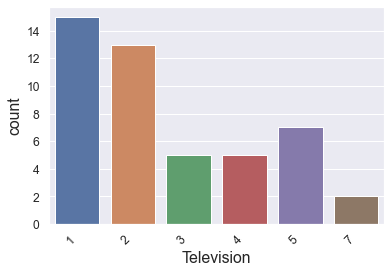

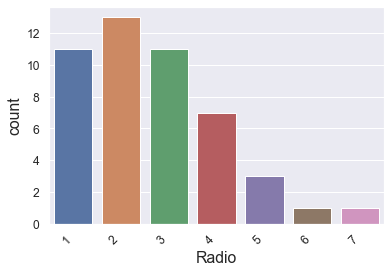

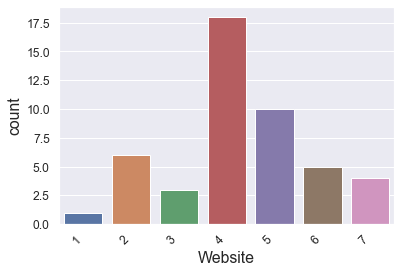

In [20]:
# Effective_Channel_LinkedIn                 0
# Effective_Channel_FB_IG                    0
# Effective_Channel_Google                   0
# Effective_Channel_YouTube                  0
# Effective_Channel_Trade_Show               0
# Effective_Channel_Webinar                  0
# Effective_Channel_Phone_Email              0
# Effective_Channel_Billboard                0
# Effective_Channel_Magazine                 0
# Effective_Channel_Television               0
# Effective_Channel_Radio                    0
# Effective_Channel_Website                  0
columns=["LinkedIn", "FB_IG", "Google", "YouTube", "Trade Show", "Webinar",
        "Phone Email","Billboard","Magazine","Television","Radio","Website"]
effective = pd.DataFrame(columns=columns)
effective["LinkedIn"] = survey_data["Effective_Channel_LinkedIn"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "LinkedIn", True, save_filename="Effective_Channel_LinkedIn");

effective["FB_IG"] = survey_data["Effective_Channel_FB_IG"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "FB_IG", True, save_filename="Effective_Channel_FB_IG");

effective["Google"] = survey_data["Effective_Channel_Google"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Google", True, save_filename="Effective_Channel_Google");

effective["YouTube"] = survey_data["Effective_Channel_YouTube"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "YouTube", True, save_filename="Effective_Channel_YouTube");

effective["Trade Show"] = survey_data["Effective_Channel_Trade_Show"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Trade Show", True, save_filename="Effective_Channel_Trade_Show");

effective["Webinar"] = survey_data["Effective_Channel_Webinar"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Webinar", True, save_filename="Effective_Channel_Webinar");

effective["Phone Email"] = survey_data["Effective_Channel_Phone_Email"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Phone Email", True, save_filename="Effective_Channel_Phone_Email");

effective["Billboard"] = survey_data["Effective_Channel_Billboard"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Billboard", True, save_filename="Effective_Channel_Billboard");

effective["Magazine"] = survey_data["Effective_Channel_Magazine"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Magazine", True, save_filename="Effective_Channel_Magazine");

effective["Television"] = survey_data["Effective_Channel_Television"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Television", True, save_filename="Effective_Channel_Television");

effective["Radio"] = survey_data["Effective_Channel_Radio"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Radio", True, save_filename="Effective_Channel_Radio");

effective["Website"] = survey_data["Effective_Channel_Website"].replace(to_replace={
    '1 - Not effective at all': 1,
    'Slightly effective': 2,
    'Moderately effective': 3,
    'Effective': 4,
    'Very Effective': 5,
    'Extremely effective': 6,
    '7 - Most Effective': 7
})
create_countplot(effective, "Website", True, save_filename="Effective_Channel_Website");

,LinkedIn,FB_IG,Google,YouTube,Trade Show,Webinar,Phone Email,Billboard,Magazine,Television,Radio,Website
count,47.000000,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,3.148936,2.702128,4.829787,4.00000,3.340426,3.553191,3.425532,2.000000,2.255319,2.659574,2.680851,4.297872
std,1.706493,1.487848,1.479118,1.60163,1.591780,1.678619,1.790612,1.251086,1.466556,1.697525,1.446230,1.458333
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.500000,4.000000,3.00000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000
50%,3.000000,2.000000,5.000000,4.00000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,4.000000
75%,4.000000,4.000000,6.000000,5.00000,4.000000,4.500000,5.000000,2.000000,3.000000,4.000000,3.500000,5.000000
max,7.000000,6.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


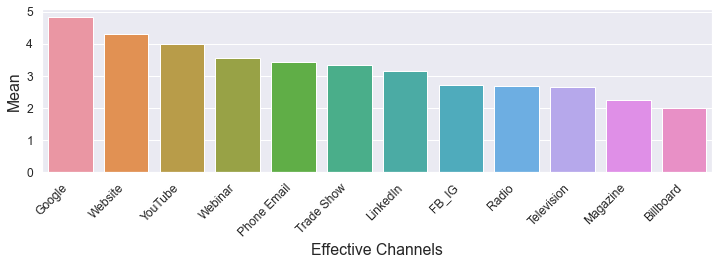

In [52]:
display(effective.describe());
means = effective.mean();
means_df = pd.DataFrame(columns=means.index).append(means, ignore_index=True)

fig = plt.figure(figsize=(12,3))
chart = sns.barplot(x=means_df.columns, y=means_df.values.flatten(), 
                    order=means_df.sort_values(by=0, axis=1, ascending=False));
chart.set_xlabel("Effective Channels");
chart.set_ylabel("Mean");
rotate_xlabels(chart)
increase_axes(chart)
save_figure(chart.get_figure(), "Effective_Channel_Means")

In [22]:
variable = "Effective";
value = "Score"
anova_analysis(effective, columns, variable, value);

Overall model F( 11, 552) =  13.708, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Effective),367.588652,11.0,13.708408,2.258020e-23
Residual,1345.617021,552.0,NaN,NaN


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
  Billboard       FB_IG   0.7021 0.5557  -0.355  1.7593  False
  Billboard      Google   2.8298  0.001  1.7727  3.8869   True
  Billboard    LinkedIn   1.1489   0.02  0.0918  2.2061   True
  Billboard    Magazine   0.2553    0.9 -0.8018  1.3124  False
  Billboard Phone Email   1.4255  0.001  0.3684  2.4827   True
  Billboard       Radio   0.6809 0.5969 -0.3763   1.738  False
  Billboard  Television   0.6596 0.6382 -0.3976  1.7167  False
  Billboard  Trade Show   1.3404 0.0021  0.2833  2.3976   True
  Billboard     Webinar   1.5532  0.001  0.4961  2.6103   True
  Billboard     Website   2.2979  0.001  1.2407   3.355   True
  Billboard     YouTube      2.0  0.001  0.9429  3.0571   True
      FB_IG      Google   2.1277  0.001  1.0705  3.1848   True
      FB_IG    LinkedIn   0.4468    0.9 -0.6103  1.5039

## Frequent Channels
If you are looking for certain products that could assist you in projects for your business/workplace, what platforms do you use most frequently when searching for products/solutions?

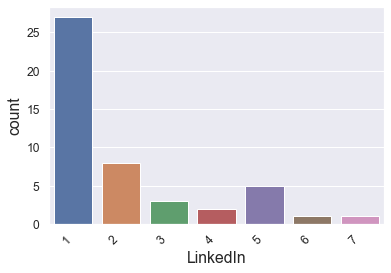

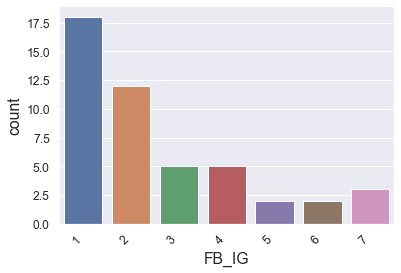

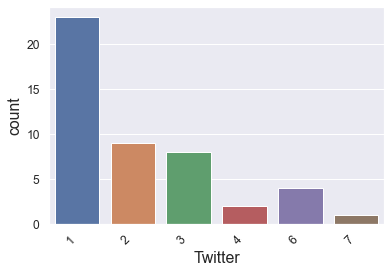

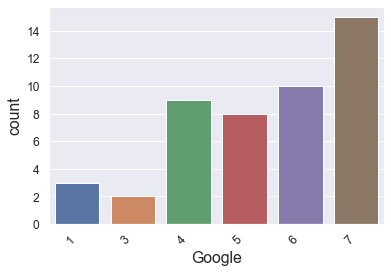

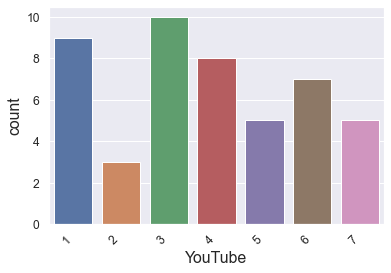

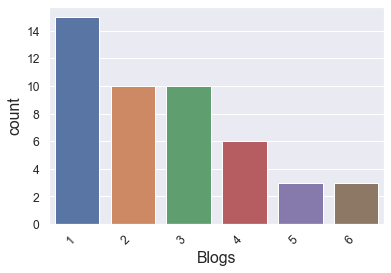

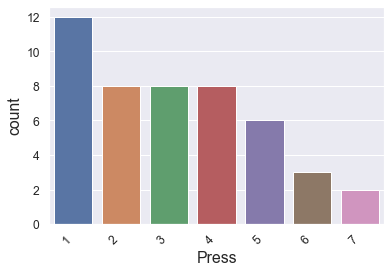

In [23]:
# Frequent_Channel_LinkedIn                  0
# Frequent_Channel__FB_IG                    0
# Frequent_Channel_Twitter                   0
# Frequent_Channel_Google                    0
# Frequent_Channel_YouTube                   0
# Frequent_Channel_Blogs                     0
# Frequent_Channel_Press                     0
columns=["LinkedIn", "FB_IG", "Twitter", "Google", "YouTube", "Blogs", "Press"]
frequent = pd.DataFrame(columns=columns)
frequent["LinkedIn"] = survey_data["Frequent_Channel_LinkedIn"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "LinkedIn", True, save_filename="Frequent_Channel_LinkedIn");

frequent["FB_IG"] = survey_data["Frequent_Channel__FB_IG"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "FB_IG", True, save_filename="Frequent_Channel__FB_IG");

frequent["Twitter"] = survey_data["Frequent_Channel_Twitter"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "Twitter", True, save_filename="Frequent_Channel_Twitter");

frequent["Google"] = survey_data["Frequent_Channel_Google"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "Google", True, save_filename="Frequent_Channel_Google");

frequent["YouTube"] = survey_data["Frequent_Channel_YouTube"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "YouTube", True, save_filename="Frequent_Channel_YouTube");

frequent["Blogs"] = survey_data["Frequent_Channel_Blogs"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "Blogs", True, save_filename="Frequent_Channel_Blogs");

frequent["Press"] = survey_data["Frequent_Channel_Press"].replace(to_replace={
    '1 - Not frequent at all': 1,
    'Slightly frequent': 2,
    'Moderately frequent': 3,
    'Frequent': 4,
    'Very frequent': 5,
    'Extremely frequent': 6,
    '7 - Most frequent': 7
})
create_countplot(frequent, "Press", True, save_filename="Frequent_Channel_Press");

,LinkedIn,FB_IG,Twitter,Google,YouTube,Blogs,Press
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2.085106,2.553191,2.212766,5.319149,3.808511,2.595745,3.106383
std,1.639589,1.827430,1.654193,1.682472,1.974162,1.527424,1.784402
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,4.000000,2.500000,1.000000,1.500000
50%,1.000000,2.000000,2.000000,6.000000,4.000000,2.000000,3.000000
75%,2.500000,3.500000,3.000000,7.000000,5.500000,3.500000,4.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000


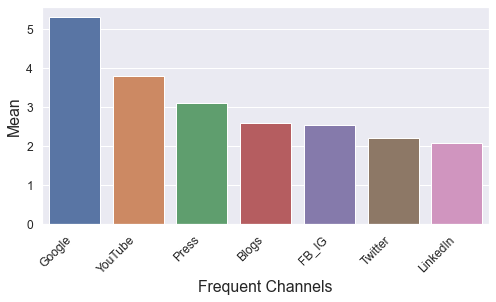

In [58]:
display(frequent.describe());
means = frequent.mean();
means_df = pd.DataFrame(columns=means.index).append(means, ignore_index=True)

fig = plt.figure(figsize=(8,4))
chart = sns.barplot(x=means_df.columns, y=means_df.values.flatten(), 
                    order=means_df.sort_values(by=0, axis=1, ascending=False));

chart.set_xlabel("Frequent Channels");
chart.set_ylabel("Mean");
rotate_xlabels(chart)
increase_axes(chart)
save_figure(chart.get_figure(), "Frequent_Channel_Means")

In [25]:
variable = "Frequent";
value = "Score"
anova_analysis(frequent, columns, variable, value);

Overall model F( 6, 322) =  20.350, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Frequent),366.462006,6.0,20.350036,3.416931e-20
Residual,966.425532,322.0,NaN,NaN


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   Blogs    FB_IG  -0.0426    0.9 -1.1029  1.0178  False
   Blogs   Google   2.7234  0.001  1.6631  3.7837   True
   Blogs LinkedIn  -0.5106 0.7589  -1.571  0.5497  False
   Blogs    Press   0.5106 0.7589 -0.5497   1.571  False
   Blogs  Twitter   -0.383    0.9 -1.4433  0.6774  False
   Blogs  YouTube   1.2128 0.0136  0.1524  2.2731   True
   FB_IG   Google    2.766  0.001  1.7056  3.8263   True
   FB_IG LinkedIn  -0.4681 0.8285 -1.5284  0.5923  False
   FB_IG    Press   0.5532 0.6893 -0.5072  1.6135  False
   FB_IG  Twitter  -0.3404    0.9 -1.4008  0.7199  False
   FB_IG  YouTube   1.2553 0.0091   0.195  2.3157   True
  Google LinkedIn   -3.234  0.001 -4.2944 -2.1737   True
  Google    Press  -2.2128  0.001 -3.2731 -1.1524   True
  Google  Twitter  -3.1064  0.001 -4.1667  -2.046   True
  Google  YouTube  -1.5106  0.0

## Previous Channels
Have you used any of the following platforms previously to search for products/solutions for your business/workplace? (Check all that applies)

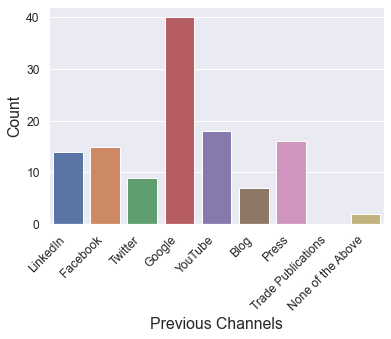

In [26]:
# Previous_Channel                           5
# Previous_Channel_Other                   120
#display(survey_data["Previous_Channel_Other"].unique())

PREVIOUS_LINKEDIN = "LinkedIn"
PREVIOUS_FB_IG = "Facebook"
PREVIOUS_TWITTER = "Twitter"
PREVIOUS_GOOGLE= "Google"
PREVIOUS_YOUTUBE = "YouTube"
PREVIOUS_BLOG = "Blog"
PREVIOUS_PRESS = "Press"
PREVIOUS_TRADE_PUBLICATIONS = "Trade Publications"
PREVIOUS_NONE = "None of the Above"

columns = [PREVIOUS_LINKEDIN, PREVIOUS_FB_IG, PREVIOUS_TWITTER, PREVIOUS_GOOGLE, PREVIOUS_YOUTUBE,
          PREVIOUS_BLOG, PREVIOUS_PRESS, PREVIOUS_TRADE_PUBLICATIONS, PREVIOUS_NONE]
previous_data = pd.DataFrame(columns=columns)
previous_data[PREVIOUS_LINKEDIN] = survey_data["Previous_Channel"].str.contains(PREVIOUS_LINKEDIN)
previous_data[PREVIOUS_FB_IG] = survey_data["Previous_Channel"].str.contains(PREVIOUS_FB_IG)
previous_data[PREVIOUS_TWITTER] = survey_data["Previous_Channel"].str.contains(PREVIOUS_TWITTER)
previous_data[PREVIOUS_GOOGLE] = survey_data["Previous_Channel"].str.contains(PREVIOUS_GOOGLE)
previous_data[PREVIOUS_YOUTUBE] = survey_data["Previous_Channel"].str.contains(PREVIOUS_YOUTUBE)
previous_data[PREVIOUS_BLOG] = survey_data["Previous_Channel"].str.contains(PREVIOUS_BLOG)
previous_data[PREVIOUS_PRESS] = survey_data["Previous_Channel"].str.contains(PREVIOUS_PRESS)
previous_data[PREVIOUS_TRADE_PUBLICATIONS] = survey_data["Previous_Channel_Other"].str.contains(PREVIOUS_TRADE_PUBLICATIONS)
previous_data[PREVIOUS_NONE] = survey_data["Previous_Channel"].str.contains("None")
previous_data[PREVIOUS_NONE] = survey_data["Previous_Channel"].fillna(True)

Previous = previous_data[previous_data==True][columns].count();
chart = sns.barplot(y=Previous.values, x=Previous.index);
rotate_xlabels(chart);
chart.set_xlabel("Previous Channels");
chart.set_ylabel("Count");
increase_axes(chart);
save_figure(chart.get_figure(), 'Previous');

## Acquisition Channels
When it comes to high tech or software products, which of the follow channels do you prefer to acquire the products from?

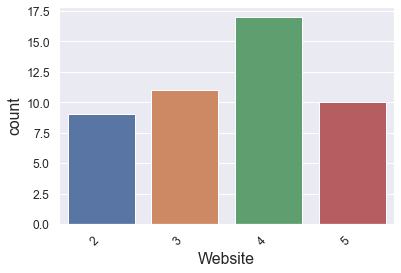

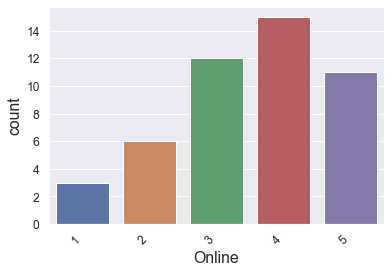

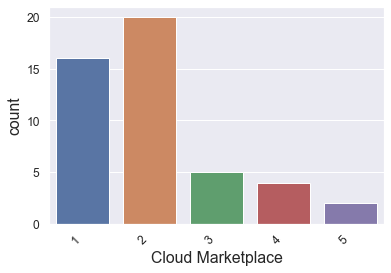

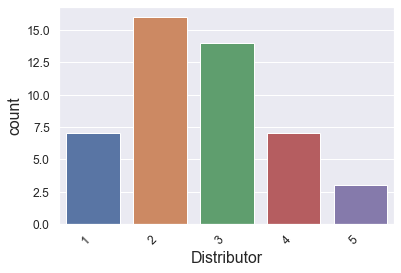

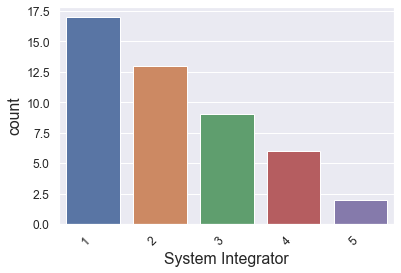

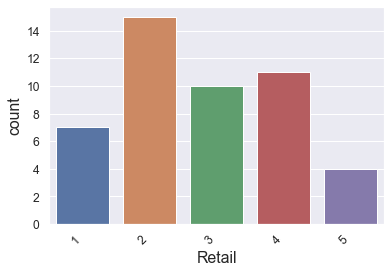

In [27]:
# Acquisition_Channel_Website                0
# Acquisition_Channel_Online                 0
# Acquisition_Channel_Cloud_Marketplace      0
# Acquisition_Channel_Distributor            0
# Acquisition_Channel_SI_Consultant          0
# Acquisition_Channel_Retail                 0

columns=["Website", "Online", "Cloud Marketplace", "Distributor", "System Integrator", "Retail"]
acquisition = pd.DataFrame(columns=columns)
acquisition["Website"] = survey_data["Acquisition_Channel_Website"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "Website", True, save_filename="Acquisition_Channel_Website");

acquisition["Online"] = survey_data["Acquisition_Channel_Online"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "Online", True, save_filename="Acquisition_Channel_Online");

acquisition["Cloud Marketplace"] = survey_data["Acquisition_Channel_Cloud_Marketplace"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "Cloud Marketplace", True, save_filename="Acquisition_Channel_Cloud_Marketplace");

acquisition["Distributor"] = survey_data["Acquisition_Channel_Distributor"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "Distributor", True, save_filename="Acquisition_Channel_Distributor");

acquisition["System Integrator"] = survey_data["Acquisition_Channel_SI_Consultant"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "System Integrator", True, save_filename="Acquisition_Channel_SI_Consultant");

acquisition["Retail"] = survey_data["Acquisition_Channel_Retail"].replace(to_replace={
    'Do not prefer': 1,
    'Prefer slightly': 2,
    'Prefer a moderate amount': 3,
    'Prefer a lot': 4,
    'Prefer a great deal': 5
})
create_countplot(acquisition, "Retail", True, save_filename="Acquisition_Channel_Retail");


,Website,Online,Cloud Marketplace,Distributor,System Integrator,Retail
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,3.595745,3.531915,2.063830,2.638298,2.212766,2.787234
std,1.035449,1.176788,1.091554,1.111707,1.196665,1.214696
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,1.000000,2.000000,1.000000,2.000000
50%,4.000000,4.000000,2.000000,3.000000,2.000000,3.000000
75%,4.000000,4.000000,2.000000,3.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


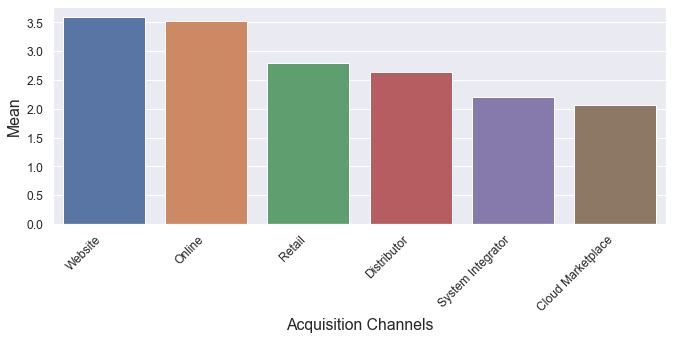

In [62]:
display(acquisition.describe());
means = acquisition.mean();
means_df = pd.DataFrame(columns=means.index).append(means, ignore_index=True)

fig = plt.figure(figsize=(11,4))
chart = sns.barplot(x=means_df.columns, y=means_df.values.flatten(), 
                    order=means_df.sort_values(by=0, axis=1, ascending=False));

chart.set_xlabel("Acquisition Channels");
chart.set_ylabel("Mean");
rotate_xlabels(chart)
increase_axes(chart)
save_figure(chart.get_figure(), "Acquisition_Channel_Means")

In [29]:
variable = "Channel";
value = "Score"
anova_analysis(acquisition, columns, variable, value);

Overall model F( 5, 276) =  15.069, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Channel),97.847518,5.0,15.069191,4.366378e-13
Residual,358.425532,276.0,NaN,NaN


           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
Cloud Marketplace       Distributor   0.5745 0.1449 -0.1002  1.2491  False
Cloud Marketplace            Online   1.4681  0.001  0.7935  2.1427   True
Cloud Marketplace            Retail   0.7234 0.0276  0.0488   1.398   True
Cloud Marketplace System Integrator   0.1489    0.9 -0.5257  0.8236  False
Cloud Marketplace           Website   1.5319  0.001  0.8573  2.2065   True
      Distributor            Online   0.8936 0.0024   0.219  1.5683   True
      Distributor            Retail   0.1489    0.9 -0.5257  0.8236  False
      Distributor System Integrator  -0.4255 0.4624 -1.1002  0.2491  False
      Distributor           Website   0.9574  0.001  0.2828  1.6321   True
           Online            Retail  -0.7447  0.021 -1.4193   -0.07   True
           Online System 